# Normalised mutational profiles from Fig 3A

In [1]:
import os
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
from scipy.stats import entropy

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
data_dir = './data'

In [4]:
sigs_color = {
'SBS1': '#1e79baff',
 'SBS2': '#ff9896ff',
 'SBS3': '#f6c200ff', 
 'SBS4': '#00a572ff', 
 'SBS5': '#7ebdeaff',
 'SBS7a': '#8c564bff', 
 'SBS7b': '#c49c94ff',
 'SBS8': '#3dbe3dff',
 'SBS13': '#d62728ff',
 'SBS17a': '#ffbb78ff',
 'SBS17b': '#ff8921ff', 
 'SBS18': '#9467bdff',
 'SBS40': '#c2e0f5ff',
 'SBS93': '#c5b0d5ff',
}

In [5]:
snv_color = {
    'C>A' : '#1e9ef0ff', 
    'C>G' : '#333333ff', 
    'C>T' : '#e62725ff', 
    'T>A' : '#c7c6c7ff', 
    'T>C' : '#2bbc5bff', 
    'T>G' : '#fbbc05ff'
}

### Load data

Input data corresponds to Dataset EV5

In [6]:
sig_profiles_f = os.path.join(data_dir, 'EV5_table.txt')
sig_profiles_df = pd.read_csv(sig_profiles_f, sep='\t', header=0)
sig_profiles_df.head(3)

,Mutation_type,Trinucleotide,Trinucleotide_genome_frequency,SBS1,SBS2,SBS3,SBS4,SBS5,SBS7a,SBS7b,...,SBS5_normalised,SBS7a_normalised,SBS7b_normalised,SBS8_normalised,SBS13_normalised,SBS17a_normalised,SBS17b_normalised,SBS18_normalised,SBS40_normalised,SBS93_normalised
0,A[C>A]A,ACA,0.040430,0.000876,5.790059e-07,0.020920,0.042451,0.012052,0.000067,0.002344,...,0.006872,0.000035,0.001179,0.032067,0.001396,0.001855,0.000603,0.025975,0.021005,0.007777
1,A[C>A]C,ACC,0.022672,0.002220,1.455045e-04,0.016343,0.032990,0.009337,0.000177,0.000457,...,0.009494,0.000164,0.000410,0.061042,0.000971,0.001445,0.000225,0.013995,0.017529,0.009555
2,A[C>A]G,ACG,0.004590,0.000180,5.361861e-05,0.001808,0.016116,0.001908,0.000073,0.000192,...,0.009584,0.000335,0.000851,0.030390,0.001831,0.000386,0.000522,0.011087,0.019676,0.010703


### Compute entropy of normalised signatures' profiles

In [7]:
signatures_to_plot = ['SBS1', 'SBS3', 'SBS5', 'SBS17a', 'SBS17b', 'SBS40']

In [8]:
mutation_types = sig_profiles_df['Mutation_type'].tolist()
mutation_types_reformat = [m[0]+m[2]+m[-1]+'>'+m[-3] for m in mutation_types]
len(mutation_types_reformat), mutation_types_reformat[:3]

(96, ['ACA>A', 'ACC>A', 'ACG>A'])

In [9]:
entropy_d = {}
norm_profiles_d = {}
for signature in signatures_to_plot:
    # Get normalised profile 
    norm_profile = sig_profiles_df[f'{signature}_normalised'].tolist()
    norm_profiles_d[signature] = dict(list(zip(mutation_types_reformat, norm_profile)))
    # Compute entropy
    norm_profile_entropy = entropy(norm_profile)
    entropy_d[signature] = norm_profile_entropy

In [10]:
entropy_d

{'SBS1': 1.4332812780845985,
 'SBS3': 4.442426499105489,
 'SBS5': 4.072647645908871,
 'SBS17a': 2.4210280199102177,
 'SBS17b': 1.8615437625834192,
 'SBS40': 4.416498067058243}

## Panel 3A

In [11]:
# Plot params
yaxis_lim = {
    'SBS1': {
        'ylabels': [0.1, 0.3, 0.5], 
        'ymax': 0.6
    },
    'SBS3': {
        'ylabels': [0.01, 0.02, 0.03], 
        'ymax': 0.04
    },
    'SBS5': {
        'ylabels': [0.025, 0.05, 0.075], 
        'ymax': 0.12
    },
    'SBS17a': {
        'ylabels': [0.1, 0.2, 0.3], 
        'ymax': 0.42
    },
    'SBS17b': {
        'ylabels': [0.2, 0.4, 0.6], 
        'ymax': 0.7
    },
    'SBS40': {
        'ylabels': [0.025, 0.05, 0.075], 
        'ymax': 0.12
    }
}

In [12]:
def plot_profile(frequencies, prof_entropy, yaxis_lim): 

    # Plot params
    fig, ax = plt.subplots(
        2, 
        sharex='col', 
        figsize=(2, 0.5), 
         gridspec_kw={'height_ratios': [0.05, 0.95]}
    )
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.01, 
                        hspace=0)

    #### Top
    axis_key = 0
    ax[axis_key].spines['top'].set_visible(False)
    ax[axis_key].spines['right'].set_visible(False)
    ax[axis_key].spines['left'].set_visible(False)
    ax[axis_key].spines['bottom'].set_visible(False)

    ax[axis_key].set_yticks([])

    subs = 'C>A'
    rect1 = Rectangle((0, 0.15), 15.75, 0.5, color=snv_color[subs])
    ax[axis_key].add_patch(rect1)
    ax[axis_key].text(15.75/2, 0.95, subs, fontsize=3.5, weight='normal', ha='center')
    subs = 'C>G'
    rect1 = Rectangle((16,0.1), 15.75, 0.5, color=snv_color[subs])
    ax[axis_key].add_patch(rect1)
    ax[axis_key].text(16 + 15.75/2 -1, 0.95, subs, fontsize=3.5, weight='normal', ha='center')
    subs = 'C>T'
    rect1 = Rectangle((32,0.1), 15.75, 0.5, color=snv_color[subs])
    ax[axis_key].add_patch(rect1)
    ax[axis_key].text(32 + 15.75/2 -1, 0.95, subs, fontsize=3.5, weight='normal', ha='center')
    subs = 'T>A'
    rect1 = Rectangle((48,0.1), 15.75, 0.5, color=snv_color[subs])
    ax[axis_key].add_patch(rect1)
    ax[axis_key].text(48 + 15.75/2 -1, 0.95, subs, fontsize=3.5, weight='normal', ha='center')
    subs = 'T>C'
    rect1 = Rectangle((64,0.1), 15.75, 0.5, color=snv_color[subs])
    ax[axis_key].add_patch(rect1)
    ax[axis_key].text(64 + 15.75/2 -1, 0.95, subs, fontsize=3.5, weight='normal', ha='center')
    subs = 'T>G'
    rect1 = Rectangle((80,0.1), 15.75, 0.5, color=snv_color[subs])
    ax[axis_key].add_patch(rect1)
    ax[axis_key].text(80 + 15.75/2 -1, 0.95, subs, fontsize=3.5, weight='normal', ha='center')


    #### PLOT 1
    axis_key = 1

    probabilities = []
    colors = []
    labels = []
    for snv_type in ['C>A', 'C>G', 'C>T', 'T>A', 'T>C', 'T>G']: 
        ref, alt = snv_type.split('>')
        for nuc5 in ['A', 'C', 'G', 'T']: 
            for nuc3 in ['A', 'C', 'G', 'T']: 
                trinucleotide = nuc5 + ref + nuc3
                trinucleotide_change = f'{trinucleotide}>{alt}'
                probabilities.append(frequencies.get(trinucleotide_change, 0))
                colors.append(snv_color[snv_type])
                labels.append(trinucleotide)

    ax[axis_key].bar(list(range(0, 96)), probabilities, width=0.8, bottom=None, align='center', color=colors)
    ax[axis_key].text(
        0.01, 0.95,
        f'{signature} normalised\nEntropy={prof_entropy:.3}',
        fontsize=4,
        weight='bold',
         ha='left',
         va='top',
         transform = ax[axis_key].transAxes
    )


    ########## Y axis
    ylabels_dict = {
        0: '', 
        1: 'Frequency'
    }

    ylabels = yaxis_lim[signature]['ylabels']
    ax[axis_key].set_yticks(ylabels)
    ax[axis_key].set_yticklabels(ylabels, fontsize=3.5, color='black', va="center", ha="center")
    ax[axis_key].set_xticks([])
    plt.xticks(rotation=90)

    for key, value in ylabels_dict.items(): 
        ax[key].set_ylabel(value, fontsize=4, rotation=90, labelpad=2)
        ax[key].set_axisbelow(True)
        for tick in ax[key].yaxis.get_major_ticks():
            tick.label.set_fontsize(3.5)
            tick.set_pad(5) 

        for location in ['top', 'bottom', 'left', 'right']:
            ax[key].spines[location].set_linewidth(0.25)

        ax[key].tick_params(axis = "x", which = "both", bottom=False)
        ax[key].tick_params(axis = "y", which = "both", left=False)
        ax[key].tick_params(axis='y', which='major', left=True, width=0.25, length=1)
        ax[key].tick_params(axis='x', which='major', pad=0)

    ax[axis_key].set_xlim(xmin=-1, xmax=96)
    ax[axis_key].set_ylim(ymin=0, ymax=yaxis_lim[signature]['ymax'])

    for extension in ['png']: 
        output = f'./fig_3A_{signature}.{extension}'
        plt.savefig(output, bbox_inches='tight', dpi=350)

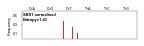

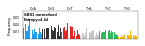

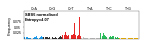

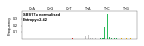

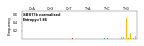

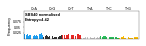

In [13]:
for signature in signatures_to_plot:

    frequencies = norm_profiles_d[signature]
    prof_entropy = entropy_d[signature]
    
    plot_profile(frequencies, prof_entropy, yaxis_lim)